# 0. PyTorch 실습 환경 구성

### PyTorch란?
Python을 염두에 두고 머신 러닝 프로젝트를 위해 설계된 오픈 소스 라이브러리로, 텐서 계산 및 GPU 가속을 활용해 Deep Learning 및 Machine Learning 어플리케이션에 적합

## 0-1. PyTorch 설치 및 import

In [1]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install torchvision

Note: you may need to restart the kernel to use updated packages.


In [3]:
import torch

# 1. 텐서(TENSOR)

배열(array)이나 행렬(matrix)과 매우 유사한 특수한 자료구조.\
PyTorch에서는 텐서를 사용하여 모델의 입력과 출력, 파라미터들을 encoding.

## 1.1 텐서 초기화

In [4]:
# 데이터로부터 직접 생성하기

data = [[1,2], [3,4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

In [5]:
# NumPy 배열로부터 생성하기
import numpy as np

np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)

In [6]:
# 다른 텐서로부터 생성하기

x_ones = torch.ones_like(x_data) # x_data의 속성을 유지
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # x_data의 속성을 덮어쓰기
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.2153, 0.6883],
        [0.9914, 0.5597]]) 



In [7]:
# 무작위(random) 또는 상수(constant) 값을 사용하기:

shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.4497, 0.9184, 0.7945],
        [0.8213, 0.5599, 0.2757]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


## 1.2 텐서의 속성 (Attribute)

텐서의 속성은 텐서의 모양(shape), 자료형(datatype) 및 어느 장치에 저장되는지를 나타냄.

In [8]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


## 1.3 텐서 연산 (Operation)

전치(transposing), 인덱싱(indexing), 슬라이싱(slicing), 수학 계산, 선형 대수, 임의 샘플링(random sampling) 등 다양한 연산이 가능

In [9]:
# 기본적으로 텐서는 CPU에 생성됨
# GPU가 존재하면 텐서를 이동
if torch.cuda.is_available():
    tensor = tensor.to("cuda")

In [10]:
# indexing과 slicing

tensor = torch.ones(4, 4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0
print(tensor)

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [11]:
# 텐서 합치기

t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

t2 = torch.stack([tensor, tensor, tensor], dim=1)
print(t2)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])
tensor([[[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]],

        [[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]],

        [[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]],

        [[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]]])


In [12]:
# 산술 연산 (Arithmetic operations)

# 두 텐서 간의 행렬 곱(matrix multiplication)
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(y1)
matmul = torch.matmul(tensor, tensor.T, out=y3)
print(matmul)

# 요소별 곱(element-wise product)
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
mul = torch.mul(tensor, tensor, out=z3)
print(mul)

tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [13]:
# Single-element 텐서
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

12.0 <class 'float'>


In [14]:
# in-ploace 연산

print(f"{tensor} \n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


## 1.4 NumPy 변환 (Bridge) 

CPU 상의 텐서와 NumPy 배열은 메모리 공간을 공유하기 때문에, 하나를 변경하면 다른 하나도 변경됨.

In [15]:
# 텐서를 NumPy 배열로 변환

t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [16]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [17]:
# NumPy 배열을 텐서로 변환

n = np.ones(5)
t = torch.from_numpy(n)

In [18]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


# 2. Dataset과 Dataloader

PyTorch는 PyTorch는 torch.utils.data.DataLoader 와 torch.utils.data.Dataset 의 두 가지 데이터 기본 요소를 제공.\
Dataset은 샘플과 정답(label)을 저장하고, DataLoader는 Dataset을 샘플에 쉽게 접근할 수 있도록 함.

## 2.1 Dataset 불러오기

In [19]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=False,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=False,
    transform=ToTensor()
)

## 2.2 Dataset 시각화

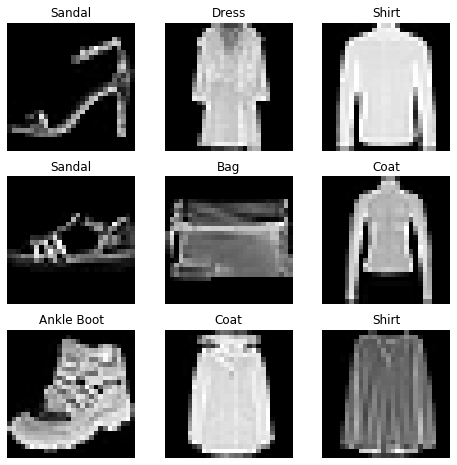

In [20]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## 2.3 사용자 정의 데이터셋 만들기

사용자 정의 Dataset 클래스는 반드시 3개 함수를 구현해야 함: __init__, __len__, and __getitem__.

### __init__
__init__ 함수는 Dataset 객체가 생성(instantiate)될 때 한 번만 실행. 여기서는 이미지와 주석 파일(annotation_file)이 포함된 디렉토리와 (다음 장에서 자세히 살펴볼) 두가지 변형(transform)을 초기화

### __len__
__len__ 함수는 데이터셋의 샘플 개수를 반환.

### __getitetm__
__getitem__ 함수는 주어진 인덱스 idx 에 해당하는 샘플을 데이터셋에서 불러오고 반환. 인덱스를 기반으로, 디스크에서 이미지의 위치를 식별하고, read_image 를 사용하여 이미지를 텐서로 변환하고, self.img_labels 의 csv 데이터로부터 해당하는 정답(label)을 가져오고, (해당하는 경우) 변형(transform) 함수들을 호출한 뒤, 텐서 이미지와 라벨을 Python 사전(dict)형으로 반환.

In [21]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file, names=['file_name', 'label'])
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

## 2.4 DataLoader로 학습용 데이터 준비하기

In [22]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

## 2.5 DataLoader를 통해 순회 (iterate)

아래 각 iteration은 (각각 batch_size=64 의 feature와 label을 포함하는) train_features 와 train_labels 의 묶음(batch)을 반환

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


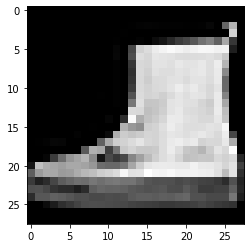

Label: 9


In [23]:
# 이미지와 정답(label) 표시
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# 3. Neural network 구성

In [24]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [25]:
# GPU 사용 가능 여부 확인
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


## 3.1 Class 정의

In [26]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [27]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [28]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([6], device='cuda:0')


## 3.2 모델 계층 (Layer)

In [29]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


In [30]:
# nn.Flatten

flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [31]:
# nn.Linear

layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [32]:
# nn.ReLU

print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[-0.0606, -0.0048,  0.0041,  0.2452, -0.1737,  0.4833,  0.4223, -0.0686,
          0.0551, -0.1160, -0.1309,  0.1689, -0.3200,  0.2192, -0.0448, -0.1412,
         -0.1294,  0.2474, -0.0657, -0.1324],
        [-0.5225, -0.3563, -0.1611,  0.3597, -0.3047,  0.2562,  0.3744, -0.2901,
          0.3118, -0.1188, -0.4072,  0.0428,  0.1332,  0.2486, -0.0272, -0.1806,
         -0.1307,  0.4045, -0.1600, -0.2495],
        [-0.3580, -0.1477,  0.1652,  0.5111,  0.1050,  0.6957,  0.5392, -0.3058,
          0.5341, -0.0945, -0.4422, -0.0158,  0.1079,  0.1105,  0.1419, -0.1921,
         -0.1992,  0.3562,  0.0622,  0.0280]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0000, 0.0000, 0.0041, 0.2452, 0.0000, 0.4833, 0.4223, 0.0000, 0.0551,
         0.0000, 0.0000, 0.1689, 0.0000, 0.2192, 0.0000, 0.0000, 0.0000, 0.2474,
         0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.3597, 0.0000, 0.2562, 0.3744, 0.0000, 0.3118,
         0.0000, 0.0000, 0.0428, 0.1332, 0.2486, 0.00

In [33]:
# nn.Sequential

seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)
print(logits)

tensor([[-3.6837e-02,  1.8916e-01, -3.4812e-01,  1.8607e-04,  2.7915e-01,
         -4.1462e-02, -1.5301e-01,  1.8917e-01,  1.7046e-01, -7.4363e-02],
        [-7.7267e-02,  1.9554e-01, -3.8065e-01,  2.2899e-02,  3.0527e-01,
         -1.6250e-01, -2.1994e-01,  2.0530e-01,  1.3812e-01, -5.9707e-02],
        [-1.1808e-01,  2.3839e-01, -3.3294e-01,  4.3500e-02,  4.2720e-01,
         -1.2124e-01, -2.9803e-01,  2.6490e-01,  8.3727e-02, -7.6621e-02]],
       grad_fn=<AddmmBackward0>)


In [34]:
# nn.Softmax

softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)
print(pred_probab)

tensor([[0.0932, 0.1168, 0.0683, 0.0967, 0.1279, 0.0928, 0.0830, 0.1168, 0.1147,
         0.0898],
        [0.0910, 0.1195, 0.0672, 0.1005, 0.1334, 0.0835, 0.0789, 0.1207, 0.1128,
         0.0926],
        [0.0855, 0.1221, 0.0689, 0.1005, 0.1474, 0.0852, 0.0714, 0.1254, 0.1046,
         0.0891]], grad_fn=<SoftmaxBackward0>)


## 3.3 모델 파라미터

In [35]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0351,  0.0173,  0.0198,  ..., -0.0336,  0.0112, -0.0018],
        [ 0.0055,  0.0305,  0.0092,  ...,  0.0187, -0.0085,  0.0136]],
       device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([0.0095, 0.0340], device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[-0.0037,  0.0145,  0.0113,  ..., -0.0319,  0.0323, -0.0132],
        [-0.0429,  0.0405,  0.0367,  ..., -0.0112,  0.0155,  0.0281]],
       device='cuda:0', grad_fn=<Slic

## 3.4 자동미분

In [36]:
x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [37]:
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x0000029B4C124DC8>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x0000029B4C124E08>


In [38]:
# Gradient 계산

loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.1626, 0.2662, 0.0491],
        [0.1626, 0.2662, 0.0491],
        [0.1626, 0.2662, 0.0491],
        [0.1626, 0.2662, 0.0491],
        [0.1626, 0.2662, 0.0491]])
tensor([0.1626, 0.2662, 0.0491])


In [39]:
# 연산 추적 멈추기 (모델 학습 완료 후 feedforward 연산만 필요할 때) - 연산 속도 향상

z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


In [40]:
z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

False
